In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import pandas
# from sklearn import linear_model

# import statsmodels.api as sm
# from statsmodels.formula.api import ols


from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/StatsFinalProject/lobster3.csv', error_bad_lines=False)

df = df[['PoundPrice', 'MillionTons', 'Licenses', 'MillionTraps', 'WaterTempCelcius', 'GasPrices', 'DieselPrices', 'GDPBillions']].dropna()
display(df)

# print(sm.stats.anova_lmt(model))
# sm.qqplot(model.resid)
# print(model.predict(df))


# import statsmodels.formula.api as smf
# model = smf.logit('PRICE_PER_LB ~ VALUE_MILLIONS + NUMBER_OF_LICENSES + NUMBER_OF_TRAPS_MILLIONS + WATER_TEMP_CELSIUS', data=df).fit()
# print(model.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


,PoundPrice,MillionTons,Licenses,MillionTraps,WaterTempCelcius,GasPrices,DieselPrices,GDPBillions
58,2.94,21329,7118,2.589,9.0,1.223,1.195,46.18
59,2.92,21336,6937,2.837,9.2,1.043,1.051,47.96
60,3.45,24265,6794,3.051,9.9,1.133,1.107,50.54
61,3.28,25953,6873,2.776,9.9,1.481,1.503,52.97
62,3.17,22053,6831,2.966,10.0,1.388,1.390,54.17
63,3.32,28860,6799,3.092,10.6,1.345,1.322,55.66
64,3.74,24934,6822,3.207,10.1,1.554,1.529,56.90
65,4.04,32466,6799,3.237,10.2,1.874,1.808,58.96
66,4.63,31175,6720,3.286,11.2,2.319,2.409,58.91
67,4.05,34176,6614,3.293,12.5,2.611,2.704,59.74


In [ ]:
df.head()


In [ ]:
df.shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f484439b8d0>,
      dtype=object)

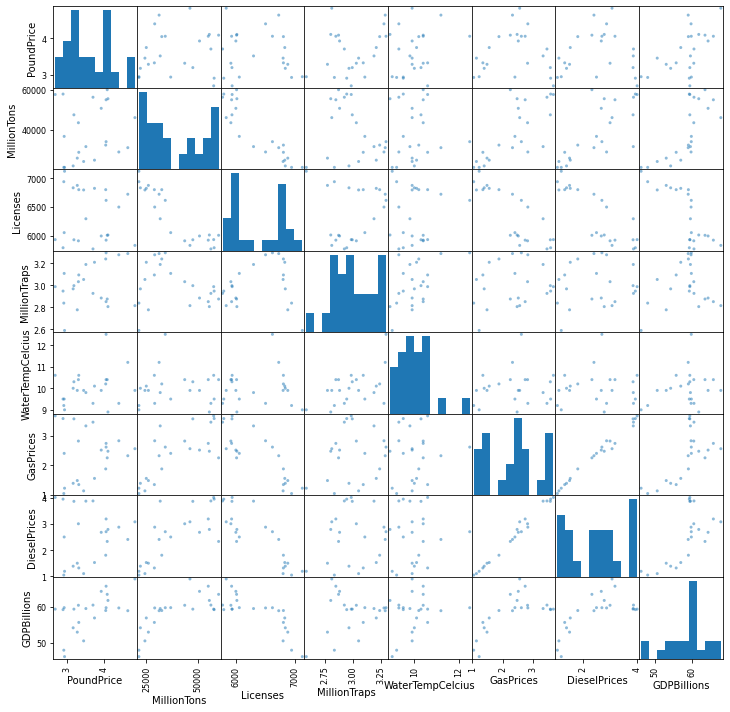

In [ ]:
#Visually see potential patterns when comparing each column to each other.
pd.plotting.scatter_matrix(df, figsize=(12,12))

In [ ]:
#Step 1: Conduct ANOVA analysis to determine if each column is different.
model = smf.ols(formula = 'PoundPrice ~ MillionTons + Licenses + MillionTraps + WaterTempCelcius + GasPrices + DieselPrices + GDPBillions', data=df).fit()

print("===============================")
print("             ANOVA")
print("===============================")
print(sm.stats.anova_lm(model), '\n')
print("=============================================================")
print("According to the ANOVA analysis, and assuming alpha = 0.05:")
print("Null Hypothesis: Equal Means ; Alternate Hypothesis: NonEqual Means")
print("The larger the F-value the more variant the means of the Columns compared to Price of Lobster.")
print("Thus, we can reject the null for MillionTraps, DieselPrices, and GDPBillions.")
print("In otherwords, at least one of these columns has a different mean than Price per Pound. Proceed to Regression Analysis.")
print("=============================================================")

             ANOVA
                    df    sum_sq   mean_sq          F    PR(>F)
MillionTons        1.0  0.140253  0.140253   0.960146  0.342691
Licenses           1.0  0.008402  0.008402   0.057520  0.813707
MillionTraps       1.0  0.829507  0.829507   5.678667  0.030832
WaterTempCelcius   1.0  0.025919  0.025919   0.177434  0.679561
GasPrices          1.0  0.470479  0.470479   3.220819  0.092882
DieselPrices       1.0  1.013407  1.013407   6.937614  0.018784
GDPBillions        1.0  3.014085  3.014085  20.633921  0.000389
Residual          15.0  2.191114  0.146074        NaN       NaN 

According to the ANOVA analysis, and assuming alpha = 0.05:
Null Hypothesis: Equal Means ; Alternate Hypothesis: NonEqual Means
The larger the F-value the more variant the means of the Columns compared to Price of Lobster.
Thus, we can reject the null for MillionTraps, DieselPrices, and GDPBillions.
In otherwords, at least one of these columns has a different mean than Price per Pound. Proceed to Reg

In [ ]:
#Step 2: Create Regression Summary using all the variables.
model = smf.ols(formula = 'PoundPrice ~ MillionTons + Licenses + MillionTraps + WaterTempCelcius + GasPrices + DieselPrices + GDPBillions', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PoundPrice   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5.381
Date:                Wed, 08 Dec 2021   Prob (F-statistic):            0.00307
Time:                        01:50:07   Log-Likelihood:                -5.5981
No. Observations:                  23   AIC:                             27.20
Df Residuals:                      15   BIC:                             36.28
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -15.3491      5.285  

In [ ]:
#Step 3: Increase Adjusted R^2 via Backward Elimination (get rid of least significant variable.)
#Get rid of MillionTraps
model = smf.ols(formula = 'PoundPrice ~ MillionTons + Licenses + WaterTempCelcius + GasPrices + DieselPrices + GDPBillions', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PoundPrice   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     6.666
Date:                Wed, 08 Dec 2021   Prob (F-statistic):            0.00111
Time:                        00:22:36   Log-Likelihood:                -5.6353
No. Observations:                  23   AIC:                             25.27
Df Residuals:                      16   BIC:                             33.22
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -15.1891      5.077  

In [ ]:
#Step 4: Increase Adjusted R^2 via Backward Elimination (get rid of least significant variable.)
#Get rid of MillionTons
model = smf.ols(formula = 'PoundPrice ~ Licenses + WaterTempCelcius + GasPrices + DieselPrices + GDPBillions', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PoundPrice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     8.353
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           0.000385
Time:                        00:22:51   Log-Likelihood:                -5.7771
No. Observations:                  23   AIC:                             23.55
Df Residuals:                      17   BIC:                             30.37
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -13.7251      3.778  

In [ ]:
#Step 5: Increase Adjusted R^2 via Backward Elimination (get rid of least significant variable.)
#Get rid of GasPrices
model = smf.ols(formula = 'PoundPrice ~ Licenses + WaterTempCelcius + DieselPrices + GDPBillions', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PoundPrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           0.000125
Time:                        00:23:31   Log-Likelihood:                -6.0117
No. Observations:                  23   AIC:                             22.02
Df Residuals:                      18   BIC:                             27.70
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -13.6578      3.707  

In [ ]:
#Step 6: Increase Adjusted R^2 via Backward Elimination (get rid of least significant variable.)
#Get rid of DieselPrices
model = smf.ols(formula = 'PoundPrice ~ Licenses + WaterTempCelcius + GDPBillions', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PoundPrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     15.10
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.89e-05
Time:                        00:24:20   Log-Likelihood:                -6.0209
No. Observations:                  23   AIC:                             20.04
Df Residuals:                      19   BIC:                             24.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -13.3897      2.876  

In [ ]:
#Step 7: Increase Adjusted R^2 via Backward Elimination (get rid of least significant variable.)
#Get rid of WaterTempCelcius
model = smf.ols(formula = 'PoundPrice ~ GDPBillions + Licenses', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PoundPrice   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     21.25
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.13e-05
Time:                        00:25:15   Log-Likelihood:                -6.9395
No. Observations:                  23   AIC:                             19.88
Df Residuals:                      20   BIC:                             23.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -12.8393      2.884     -4.452      

**Looking at Steps 2-7: Process to get rid of non-significant variables to maximize R^2.
Step 6 yields the larged Adjusted R^2, thus, use the same variables listed for step 6 model.**

                            OLS Regression Results                            
Dep. Variable:             PoundPrice   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     15.10
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           2.89e-05
Time:                        21:52:41   Log-Likelihood:                -6.0209
No. Observations:                  23   AIC:                             20.04
Df Residuals:                      19   BIC:                             24.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -13.3897      2.876  

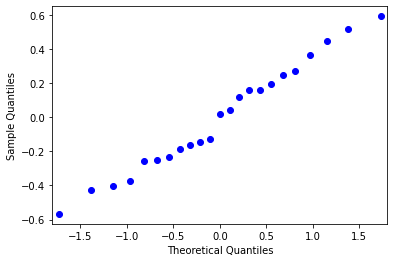

In [ ]:
model = smf.ols(formula = 'PoundPrice ~ Licenses + WaterTempCelcius + GDPBillions', data=df).fit()
print(model.summary(), '\n', '\n', '\n')


print("===============================")
print("            RESIDUAL")
print("===============================")
sm.qqplot(model.resid)
print(model.predict(df))